# Exercise03 : Just Train in Your Working Machine

Before running on Azure Machine Learning, train example script and create a model as usual in your local compute.<br>
In this exercise, we don't use Azure Machine Learning and just run sample code locally with TensorFlow.

*back to [index](https://github.com/tsmatz/azureml-tutorial/)*

Show top 3 images in test data.

2022-10-04 01:10:22.841329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 01:10:23.028426: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-04 01:10:23.028469: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-04 01:10:23.073236: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-04 01:10:24.046594: W tensorflow/stream_executor/platform/de

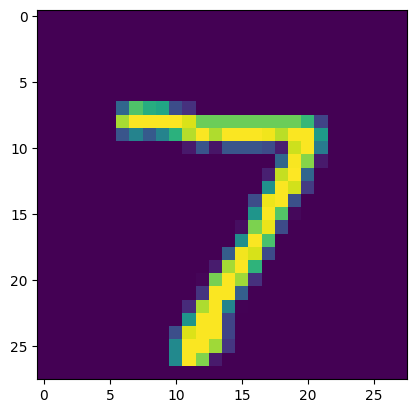

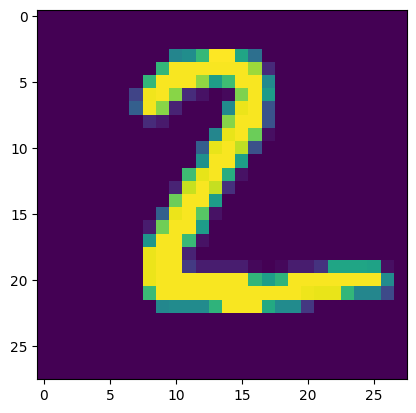

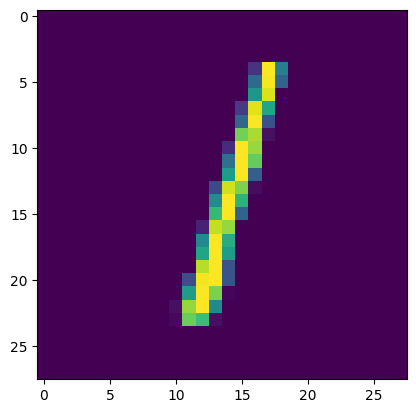

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

test_data = tf.data.Dataset.load("./data/test")

for image, label in test_data.take(3):
    plt.imshow(image)
    plt.show()

Train your model in local.<br>
This code (exact same code) will be used in the following exercises with AML.

In [2]:
import os
import argparse
import tensorflow as tf

# parse arguments
parser = argparse.ArgumentParser()
parser.add_argument(
    "--data_folder",
    type=str,
    default="./data/train",
    help="Folder path for input data")
parser.add_argument(
    "--model_folder",
    type=str,
    default="./outputs",  # AML experiments outputs folder
    help="Folder path for model output")
parser.add_argument(
    "--learning_rate",
    type=float,
    default="0.001",
    help="Learning Rate")
parser.add_argument(
    "--first_layer",
    type=int,
    default="128",
    help="Neuron number for the first hidden layer")
parser.add_argument(
    "--second_layer",
    type=int,
    default="64",
    help="Neuron number for the second hidden layer")
parser.add_argument(
    "--epochs_num",
    type=int,
    default="6",
    help="Number of epochs")
FLAGS, unparsed = parser.parse_known_args()

# build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(FLAGS.first_layer, activation="relu"),
    tf.keras.layers.Dense(FLAGS.second_layer, activation="relu"),
    tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(FLAGS.learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# run training
train_data = tf.data.experimental.load(FLAGS.data_folder)
model.fit(
    train_data.shuffle(1000).batch(128).prefetch(tf.data.AUTOTUNE),
    epochs=FLAGS.epochs_num
)

# save model and variables
model_path = os.path.join(FLAGS.model_folder, "mnist_tf_model")
model.save(model_path)
print("current working directory : ", os.getcwd())
print("model folder : ", model_path)

Epoch 1/6
469/469 [==============================] - 4s 8ms/step - loss: 2.8714 - sparse_categorical_accuracy: 0.8375
Epoch 2/6
469/469 [==============================] - 4s 7ms/step - loss: 0.4473 - sparse_categorical_accuracy: 0.9050
Epoch 3/6
469/469 [==============================] - 4s 8ms/step - loss: 0.2766 - sparse_categorical_accuracy: 0.9302
Epoch 4/6
469/469 [==============================] - 3s 7ms/step - loss: 0.2014 - sparse_categorical_accuracy: 0.9455
Epoch 5/6
469/469 [==============================] - 3s 7ms/step - loss: 0.1583 - sparse_categorical_accuracy: 0.9554
Epoch 6/6
469/469 [==============================] - 3s 7ms/step - loss: 0.1427 - sparse_categorical_accuracy: 0.9583
INFO:tensorflow:Assets written to: ./outputs/mnist_tf_model/assets
current working directory :  /home/tsmatsuz/cli_yaml
model folder :  ./outputs/mnist_tf_model


Predict using generated model. This code will be used in "[Exercise08 : Publish as a Web Service](./exercise08_publish_model.ipynb)".

In [3]:
import tensorflow as tf

test_data = tf.data.Dataset.load("./data/test")

loaded_model = tf.keras.models.load_model("./outputs/mnist_tf_model")
for image, true_value in test_data.take(3):
    pred_output = loaded_model(tf.expand_dims(image, axis=0))
    pred_value = tf.math.argmax(pred_output, axis=-1).numpy().item()
    print("Predicted {}, True {}".format(pred_value, true_value))

Predicted 7, True 7
Predicted 2, True 2
Predicted 1, True 1
